In [1]:
import pandas as pd
import numpy as np

In [2]:
import json
with open('users_with_age_and_gender.json', 'r')  as f:
    features = json.load(f)

In [3]:
len(features.keys())

153178

In [16]:
features

{'954': [[0.0,
   0.015151515151515152,
   0.015151515151515152,
   0.0,
   0.015151515151515152,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.045454545454545456,
   0.0,
   0.0,
   0.0,
   0.015151515151515152,
   0.030303030303030304,
   0.0,
   0.0,
   0.015151515151515152,
   0.015151515151515152,
   0.015151515151515152,
   0.0,
   0.0,
   0.015151515151515152,
   0.0,
   0.015151515151515152,
   0.015151515151515152,
   0.030303030303030304,
   0.015151515151515152,
   0.015151515151515152,
   0.0,
   0.0,
   0.0,
   0.0,
   0.06060606060606061,
   0.0,
   0.0,
   0.0,
   0.015151515151515152,
   0.0,
   0.0,
   0.015151515151515152,
   0.015151515151515152,
   0.015151515151515152,
   0.0,
   0.0,
   0.0,
   0.045454545454545456,
   0.0,
   0.09090909090909091,
   0.015151515151515152,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.015151515151515152,
   0.0,
   0.015151515151515152,
   0.030303030303030304,
   0.0,
   0.030303030303030304,
   0.0,


In [4]:
edges = pd.read_csv('edges.csv')

In [5]:
edges2 = edges[(edges.Source.isin(np.array(list(features.keys())).astype(int)))&(edges.Target.isin(np.array(list(features.keys())).astype(int)))]

In [6]:
edges2

Source     Target
0              365     989472
1              365    2425825
2              365      76866
3              365        259
4              365   14092932
...            ...        ...
1387543  289489256    4214123
1387544   50563461    3526026
1387545     483877  101579784
1387546    8947289    9240403
1387547    8947289    2735420

[1150146 rows x 2 columns]

In [7]:
old_indexes = np.array(list(features.keys())).astype(int)
new_indexes = range(len(old_indexes))
voc1 = dict(zip(old_indexes, new_indexes))
voc2 = dict(zip(new_indexes, old_indexes))

In [8]:
edges2.Source = edges2.Source.apply(lambda x: voc1[x])
edges2.Target = edges2.Target.apply(lambda x: voc1[x])

d:\mlp\venv\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [9]:
edges2

Source  Target
0        146316   63767
1        146316   36687
2        146316   80200
3        146316       5
4        146316  139240
...         ...     ...
1387543   49116   68107
1387544   45172  148700
1387545    2056  105510
1387546   42589   12528
1387547   42589   97530

[1150146 rows x 2 columns]

In [10]:
features2 = dict(zip(new_indexes, features.values()))

In [11]:
edges2

Source  Target
0        146316   63767
1        146316   36687
2        146316   80200
3        146316       5
4        146316  139240
...         ...     ...
1387543   49116   68107
1387544   45172  148700
1387545    2056  105510
1387546   42589   12528
1387547   42589   97530

[1150146 rows x 2 columns]

In [14]:
format_features = []
for i in list(features2.keys()):
    arr = features2[i][0].copy()
    arr.append(features2[i][1])
    arr.append(features2[i][2])
    format_features.append(arr)

In [15]:
format_features

[[0.0,
  0.015151515151515152,
  0.015151515151515152,
  0.0,
  0.015151515151515152,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.045454545454545456,
  0.0,
  0.0,
  0.0,
  0.015151515151515152,
  0.030303030303030304,
  0.0,
  0.0,
  0.015151515151515152,
  0.015151515151515152,
  0.015151515151515152,
  0.0,
  0.0,
  0.015151515151515152,
  0.0,
  0.015151515151515152,
  0.015151515151515152,
  0.030303030303030304,
  0.015151515151515152,
  0.015151515151515152,
  0.0,
  0.0,
  0.0,
  0.0,
  0.06060606060606061,
  0.0,
  0.0,
  0.0,
  0.015151515151515152,
  0.0,
  0.0,
  0.015151515151515152,
  0.015151515151515152,
  0.015151515151515152,
  0.0,
  0.0,
  0.0,
  0.045454545454545456,
  0.0,
  0.09090909090909091,
  0.015151515151515152,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.015151515151515152,
  0.0,
  0.015151515151515152,
  0.030303030303030304,
  0.0,
  0.030303030303030304,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.045454545454545456,
  0.0,
  0.0,
 

In [12]:
len(format_features)

153178

In [13]:
all_pairs = edges2.groupby('Source').Target.apply(list)

In [14]:
def bfs(graph, start):
    path = []
    queue = [start]
    while queue:
        vertex = queue.pop(0)
        if (vertex not in path):
            path.append(vertex)
            queue.extend(set(graph[vertex]) - set(path))
#             if len(path)%1000==0:
#                 print(len(path))
    return path

In [15]:
path0 = np.load('path_0.npy')
path1 = np.load('path_1.npy')

In [16]:
import torch
from torch_geometric.data import Data

In [17]:
from torch_geometric.utils import remove_isolated_nodes
def create_graph(seq, el_num):
    element = seq[el_num]
    new_seq = seq[:el_num]
    sorted_new_seq = np.sort(new_seq)
    order = [np.where(new_seq==x)[0].item() for x in sorted_new_seq]
    res = np.array(pd.Series(seq[:el_num]).isin(all_pairs[element]).astype(int))
    res = res[order]
    edge_index = torch.tensor(np.array(edges2[(edges2.Source.isin(new_seq)) & (edges2.Target.isin(new_seq))]))
    q = remove_isolated_nodes(edge_index)
    edge_index = torch.tensor(q[0])
    temp = np.zeros(len(format_features))
    temp[:len(q[2])] = q[2]
    x = torch.tensor(format_features)[temp.astype(bool)]
    data = Data(x=x, edge_index=edge_index.t().contiguous())
    node_features = format_features[element]
    return(data, res, node_features)

In [18]:
def create_batch(sequences, el_num):
    graphs = []
    results = []
    features = []
    for i in sequences:
        info = create_graph(i, el_num)
        graphs.append(info[0])
        results.append(info[1])
        features.append(info[2])
    return(graphs, results, features)

In [19]:
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
import torch.nn as nn
from torch_geometric.nn import avg_pool, global_add_pool
import torch_geometric.nn as pyg_nn
from torch_geometric.data import Data, DataLoader, NeighborSampler
from torch.nn import BatchNorm1d, Linear

In [20]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = GCNConv(112, 250)
        self.conv2 = GCNConv(250, 250)
        self.graph_to_h0 = nn.Linear(112, 150)
        self.graph_to_c0 = nn.Linear(112, 150)
        self.lstm = nn.LSTM(250, 150, batch_first = True) 
        self.logits = nn.Linear(150, 1)
    def forward(self, data, features):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        num_graphs = data.num_graphs
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = x.view((num_graphs,int(len(x)/num_graphs),250))
        initial_cell = self.graph_to_c0(features)
        initial_hid = self.graph_to_h0(features)
        state = (initial_cell[None], initial_hid[None])
        lstm_out, state = self.lstm(x, state)
        logits = self.logits(lstm_out)
        res = F.sigmoid(logits)
        return res
        


In [21]:
model = Net()

In [22]:
loader = DataLoader(create_batch([path0, path1], 10)[0], batch_size=2)

In [28]:
def computeLoss(network, batch, el_num, batch_size):
    info = create_batch(batch, el_num)
    loader = DataLoader(info[0], batch_size=batch_size)
    res = torch.tensor(info[1]).to(device)
    node_features = torch.tensor(info[2]).to(device)
    for i in loader:
        q = i.to(device)
        preds = network.forward(q, node_features).squeeze(-1)
    loss = F.binary_cross_entropy(preds, res.float())
    del node_features
    del res
    del loader
    del q
    torch.cuda.empty_cache()
    return(loss)


In [29]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# device = torch.device('cpu')
model = Net()
model = model.to(device)
optimizer = torch.optim.Adam(model.parameters(), 
                       lr=1e-3)

In [30]:
train = []
test = []
for i in range(25):
    if i in all_pairs:
        train.append(np.load('path_'+str(i)+'.npy'))
for i in range(25,50):
    if i in all_pairs:
        test.append(np.load('path_'+str(i)+'.npy'))
train = torch.tensor(train)
test = torch.tensor(test)

In [31]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline

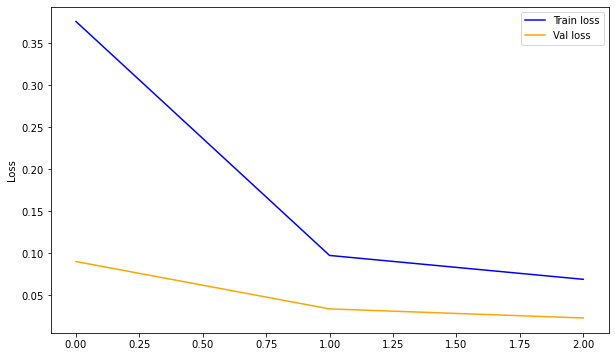

RuntimeError: CUDA error: unspecified launch failure

In [32]:
num_epoch = 20
n_batches_per_epoch = 5
batch_size = 5
n_validation_batches = 8
train_losses = []
val_losses = []
for epoch in range(num_epoch):
    train_loss= 0
    val_loss = 0
    model.train(True)
    order = np.random.permutation(len(train))
    order2 = np.random.permutation(len(test))
    indexes = np.random.randint(1, 1000, n_batches_per_epoch)
    for _ in (indexes):
        optimizer.zero_grad()
        batch_indexes = order[0:0+batch_size]
        x_batch = train[batch_indexes]
        x_batch = list(np.array(x_batch))
        loss_value = computeLoss(model, x_batch, _, batch_size)
        loss_value.backward()
        optimizer.step()
        train_loss += loss_value.item()
    train_loss /= (n_batches_per_epoch)
    train_losses.append(train_loss)
    model.train(False)
    for _ in (indexes):
        batch_indexes = order2[0:0+batch_size]
        x_batch = test[batch_indexes]
        x_batch = list(np.array(x_batch))
        
        loss_value = computeLoss(model, x_batch, _, batch_size)
        val_loss += loss_value.item()
    val_loss /= (n_validation_batches)
    val_losses.append(val_loss)
    clear_output()
    plt.figure(figsize = (10, 6))
    plt.plot(train_losses, label = 'Train loss', color = 'blue')
    plt.plot(val_losses, label = 'Val loss', color = 'orange')
    plt.legend()
    plt.ylabel('Loss')
    plt.show()